# To develop a DNA identification service:

The query sequence can be run against the fasta sequences, dog_breeds.fa preprocessed from GEO database, 
which is a public functional genomics data repository to identify closest breed. 

#Different ways of identifying closest breed:

Method 1: Using PairwiseAligner from Bio.Align package.

In [4]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner

def identify_closest_breed(database_file, query_file):
    """
        Question 1
        The function returns closest breed to the query sequence and the distance.
        
        Example use: identify_closest_breed('dog_breeds.fa', 'mystery.fa')
        Example output: ('gb|AY656744.1|', 24.0)
    """
    # Read the database file into a list of SeqRecord objects
    database_seqs = list(SeqIO.parse('../my_coursework/dog_breeds.fa', 'fasta'))
    
    # Read the query file and get its sequence as a Seq object
    query_seq = SeqIO.read('../my_coursework/mystery.fa', 'fasta').seq
    for record in query_seq:
    
    # Initialize variables to keep track of the closest breed and its edit distance
        closest_breed = None
        closest_distance = float('inf')
    
    # Create a PairwiseAligner object with the xalign function and match score of 1
    aligner = PairwiseAligner()
    aligner.mode = 'global'
    aligner.match_score = 1
    
    # Loop through each sequence in the database and calculate its edit distance to the query sequence
    for database_seq in database_seqs:
        alignment = aligner.align(database_seq.seq, query_seq)
        distance = len(query_seq) - alignment.score
        if distance < closest_distance:
            closest_breed = database_seq.id
            closest_distance = distance
    
    # Return the closest breed
    return closest_breed, closest_distance
#closest_breed = identify_closest_breed('dog_breeds.fa', 'mystery.fa')
#print(database_seq)

In [5]:
identify_closest_breed('../my_coursework/dog_breeds.fa', '../my_coursework/mystery.fa')

('gb|AY656744.1|', 24.0)

# Method 2:
Running Multiple sequence alignment using MEGA11 software. The alignment output is saved as a fasta format text file, 
that is used for calculating the differences among the sequences. 
(the code is taking more time to give the output, so the output file is provided)

#Calculating the difference after Sequence alignment.

In [ ]:
from Bio import AlignIO
from Bio.Align import PairwiseAligner

def closest_breed(aligned_file):
    # Read in the aligned file
    alignment = AlignIO.read("../my_coursework/aligned1.fas", "fasta")

    # Create a PairwiseAligner object
    aligner = PairwiseAligner()

    # Set the aligner parameters
    aligner.mode = 'global'
    aligner.match_score = 1
    aligner.mismatch_score = 0

    # Open the output file for writing
    with open("output.txt", "w") as f:
        # Iterate over pairs of sequences
        for i in range(len(alignment)):
            for j in range(i + 1, len(alignment)):
                seq1 = alignment[i].seq
                seq2 = alignment[j].seq

                # Perform a pairwise sequence alignment
                alignments = aligner.align(seq1, seq2)

                # Count the number of differences
                num_diffs = 0
                for k in range(len(seq1)):
                    if seq1[k] != seq2[k]:
                        num_diffs += 1

                # Write the results to the output file
                f.write("Alignment between " + alignment[i].id + " and " + alignment[j].id + "\n")
                f.write(str(alignments[0]) + "\n")
                f.write("Number of differences: " + str(num_diffs) + "\n")
                f.write("\n")

In [ ]:
closest_breed('../my_coursework/aligned1.fas')

# Stretch goal 1:

Probabilities across the database:

In [11]:
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro

def calculate_pvalue(alignment_file):
    
    with open("../my_coursework/aligned1.fas", 'r') as f:
        lens = [len(l) for l in f]
        shapiro(lens)
        
        N = 500
    x = scipy.stats.laplace.rvs(size=N)
    print(shapiro(x))
    fig, ax = plt.subplots()
    ax.hist(x)
    plt.show()

ShapiroResult(statistic=0.9710763096809387, pvalue=2.2605620486615408e-08)


/l_mnt/python/envs/teaching/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


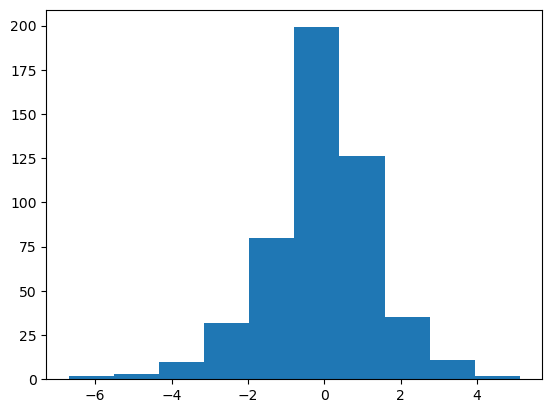

In [12]:
calculate_pvalue('../my_coursework/aligned1.fas')

# Stretch goal 2:
Reconstructed phylogeny

In [13]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Align.Applications import MuscleCommandline

def phylo_tree(alignment_file):
    # Load the sequence alignment file
    alignment_file = "../my_coursework/aligned1.fas"
    alignment = AlignIO.read(alignment_file, "fasta")

    # Compute the distance matrix using Kimura's two-parameter model
    calculator = DistanceCalculator("identity")
    dm = calculator.get_distance(alignment)

    # Construct the tree using the neighbor-joining method
    constructor = DistanceTreeConstructor(calculator, "nj")
    tree = constructor.build_tree(alignment)

    # Visualize the tree using Phylo
    Phylo.draw_ascii(tree)

In [14]:
phylo_tree("../my_coursework/aligned1.fas")

  __ gb|KU290735.1|_location=mitochondrion...
 |
 |_ gb|KU290781.1|_location=mitochondrion...
 |
 |  , gb|KU290591.1|_location=mitochondrion...
 | _|
 || , gb|KU290649.1|_location=mitochondrion...
 ,| |
 || | gb|KU290670.1|_location=mitochondrion...
 ||
 || gb|KU290567.1|_location=mitochondrion...
 |
 , gb|KU290986.1|_location=mitochondrion...
 |
 |, gb|KU290702.1|_location=mitochondrion...
 ||
 || gb|KU291013.1|_location=mitochondrion...
 |
 |__ gb|KU290984.1|_location=mitochondrion...
 |
 |__ gb|KU290640.1|_location=mitochondrion...
 |
 | gb|KU290417.1|_location=mitochondrion...
 |
 | ___ gb|KU290694.1|_location=mitochondrion...
 ||
 || _ gb|KU290632.1|_location=mitochondrion...
 |||
 |||_ gb|KU290506.1|_location=mitochondrion...
 |||
 |||_ gb|KU290529.1|_location=mitochondrion...
 |||
 ||| gb|KU290531.1|_location=mitochondrion...
 |||
 ||| gb|KU290726.1|_location=mitochondrion...
 ||
 ||   , gb|KU290594.1|_location=mitochondrion...
 ,|  _|
 ||,| | gb|KU290786.1|_location=mitochondri